# Results Evaluation

In [1]:
%run ../scripts/load_df_for_analysis.py

In [2]:
%run ../scripts/data_visualisations.py

In [3]:
%run ../scripts/df_calculations.py

## Overall model results

### Comparison of best GPT and best Llama Model (from tested models on this data): <br>GPT 4.1 vs. Llama 3.1:70b

In [4]:
chunking = "1024_20"
only_text = True
model = "gpt-4.1-2025-04-14"
df_gpt = load_df_for_analysis(chunking, only_text, model)
results_gpt = eval_predictions(df_gpt, include_relabelled_partially=True)
results_gpt_no_partially = eval_predictions(df_gpt, include_relabelled_partially=False)

In [5]:
chunking = "256_20"
only_text = True
model = "llama3.1.70b"
df_llama = load_df_for_analysis(chunking, only_text, model)
results_llama = eval_predictions(df_llama, include_relabelled_partially=True)
results_llama_no_partially = eval_predictions(df_llama, include_relabelled_partially=False)

In [6]:
model_results = {
    "GPT-4.1 (1024 token chunks)": results_gpt,
    "Llama 3.1:70b (256 token chunks)": results_llama,
}

model_results_no_partially = {
    "GPT-4.1 (1024 token chunks)": results_gpt_no_partially,
    "Llama 3.1:70b (256 token chunks)": results_llama_no_partially
}

display_model_results_table(model_results)
display_model_results_table(model_results_no_partially)

,Balanced Accuracy,Precision (Unsubstantiated),Recall (Unsubstantiated),F1 Score (Unsubstantiated),Precision (Substantiated),Recall (Substantiated),F1 Score (Substantiated)
Model,,,,,,,
GPT-4.1 (1024 token chunks),0.856,0.877,0.809,0.842,0.844,0.902,0.872
Llama 3.1:70b (256 token chunks),0.827,0.763,0.896,0.824,0.893,0.758,0.820


,Balanced Accuracy,Precision (Unsubstantiated),Recall (Unsubstantiated),F1 Score (Unsubstantiated),Precision (Substantiated),Recall (Substantiated),F1 Score (Substantiated)
Model,,,,,,,
GPT-4.1 (1024 token chunks),0.873,0.890,0.832,0.860,0.865,0.913,0.888
Llama 3.1:70b (256 token chunks),0.840,0.762,0.925,0.836,0.922,0.754,0.830


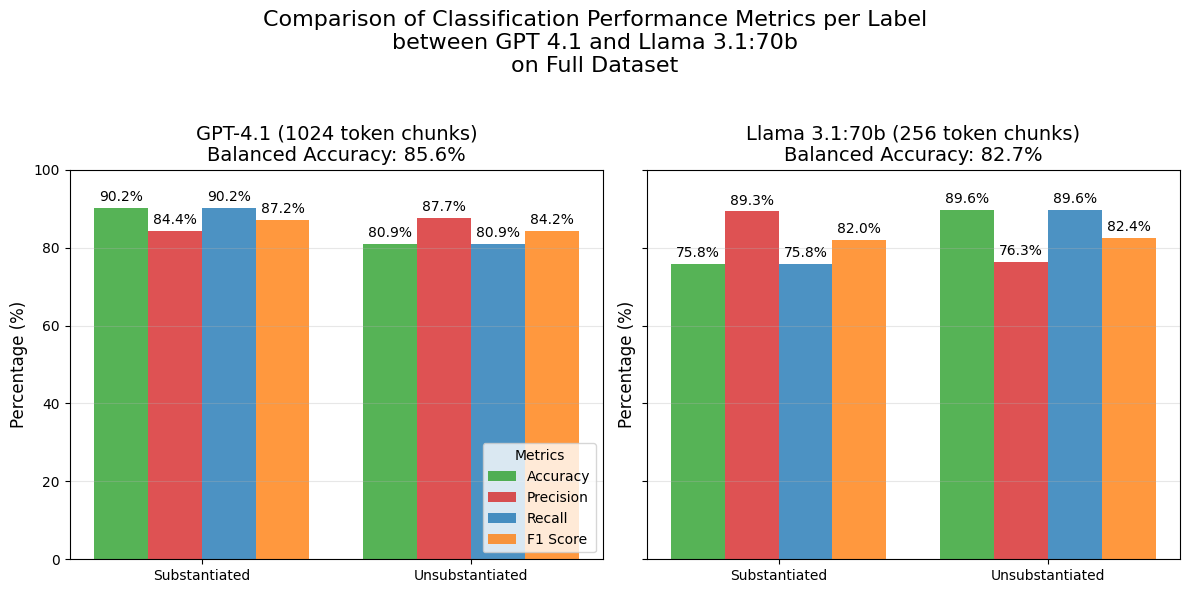

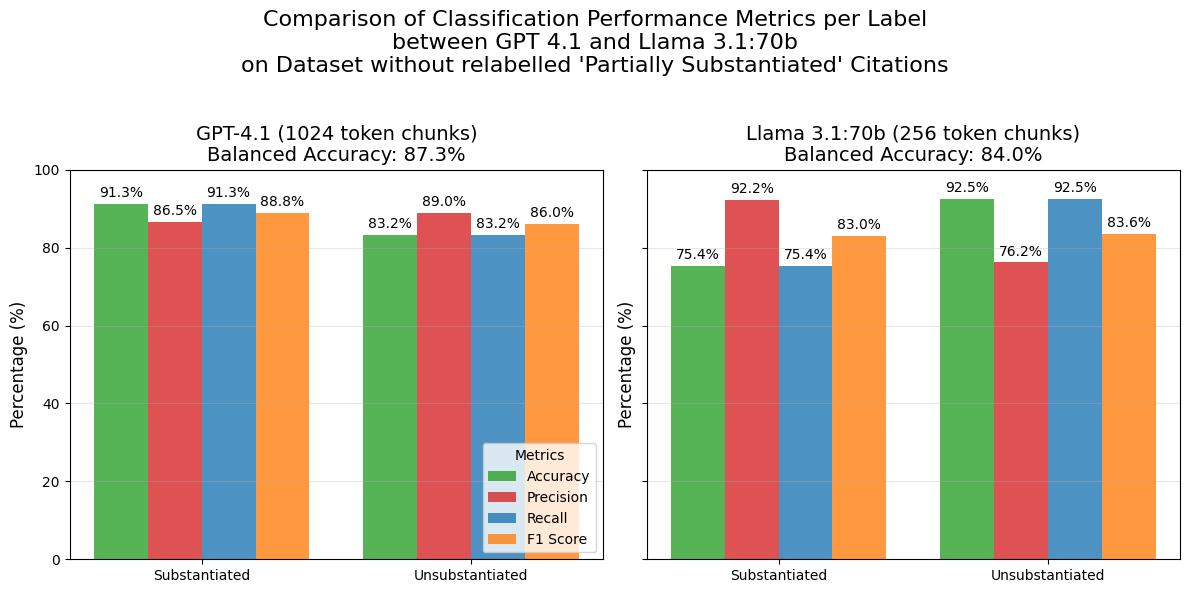

In [7]:
show_metrics_per_label(model_results, "Comparison of Classification Performance Metrics per Label\nbetween GPT 4.1 and Llama 3.1:70b\non Full Dataset")

show_metrics_per_label(model_results_no_partially, "Comparison of Classification Performance Metrics per Label\nbetween GPT 4.1 and Llama 3.1:70b\non Dataset without relabelled 'Partially Substantiated' Citations")

## Comparison: Evaluation per Annotation Attribute

In [8]:
def attribute_predictions_per_model(model_dfs, attribute, relabelled_partially=False, group_numbers_from=False):
    results = {}
    for model_name, df in model_dfs.items():
        results[model_name] = eval_predictions_per_attribute_value(df, attribute, include_relabelled_partially=True, group_numbers_from=group_numbers_from)
        if relabelled_partially:
            results[model_name + " (exclude relabelled partially)"] = eval_predictions_per_attribute_value(df, attribute, include_relabelled_partially=False, group_numbers_from=group_numbers_from)
    return results

In [9]:
def significance_per_attribute_per_model(model_dfs, attribute, group_numbers_from=False):
    for model_name, df in model_dfs.items():
        results = {}
        attribute_groups = get_attribute_value_groups(df, attribute, group_numbers_from)
        for group_name, attribute_values_list in attribute_groups:
            results[group_name] = calc_significance_of_accuracy_difference(
                eval_attribute_subset_vs_rest(df, attribute, attribute_values_list)
            )
        print(f"Significance results for {model_name} on attribute '{attribute}':")
        display_significance_test_results(results)

In [10]:
model_dfs = {
    "GPT-4.1": df_gpt,
    "Llama 3.1:70b": df_llama
}

### Reference Only

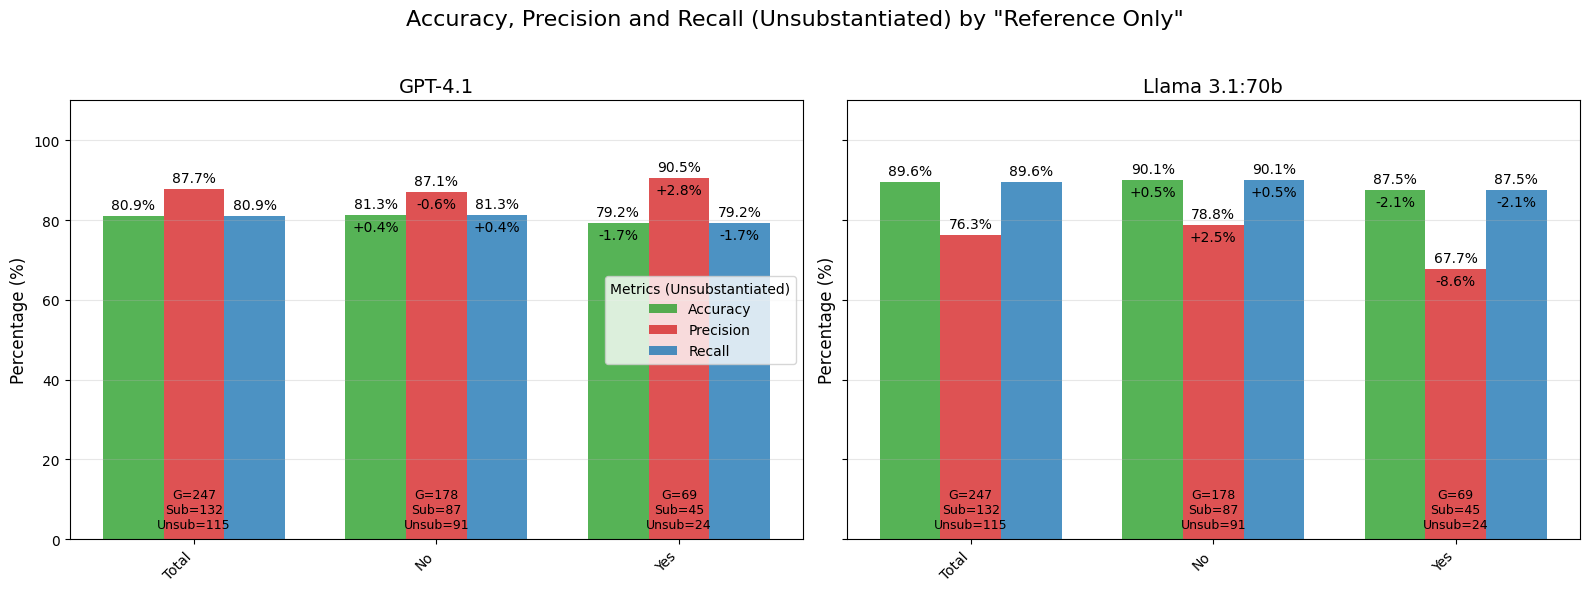

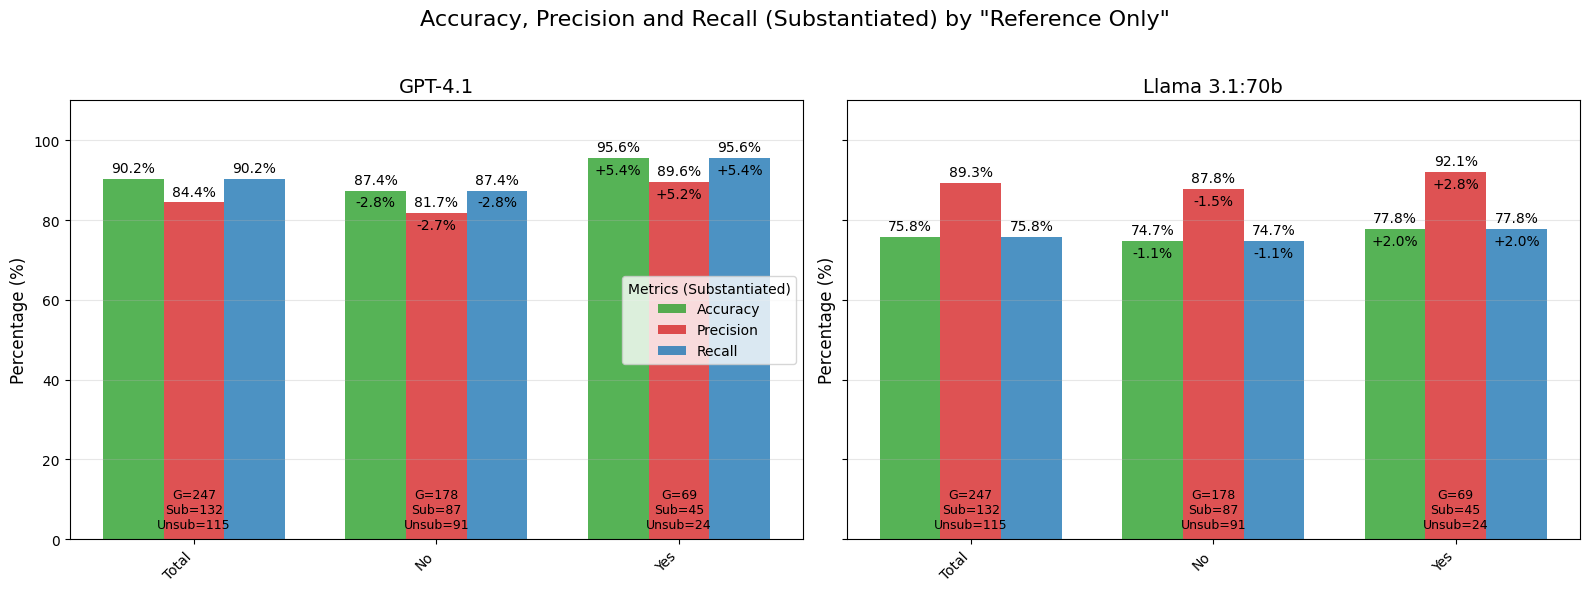

In [11]:
attribute = "Reference Only"
results = attribute_predictions_per_model(model_dfs, attribute)
show_metrics_by_attribute_values(results, attribute, "Unsubstantiated")
show_metrics_by_attribute_values(results, attribute, "Substantiated")

In [12]:
significance_per_attribute_per_model(model_dfs, attribute)

Significance results for GPT-4.1 on attribute 'Reference Only':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
Yes,1.6533,0.3129,0.8730,0.7769,3.1118,0.2172
No,0.6048,0.3129,1.1455,0.7769,0.3214,0.2172


Significance results for Llama 3.1:70b on attribute 'Reference Only':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
Yes,0.9084,0.8533,0.7683,0.7123,1.1846,0.8311
No,1.1008,0.8533,1.3016,0.7123,0.8442,0.8311


### Claim Contains Number or Formula

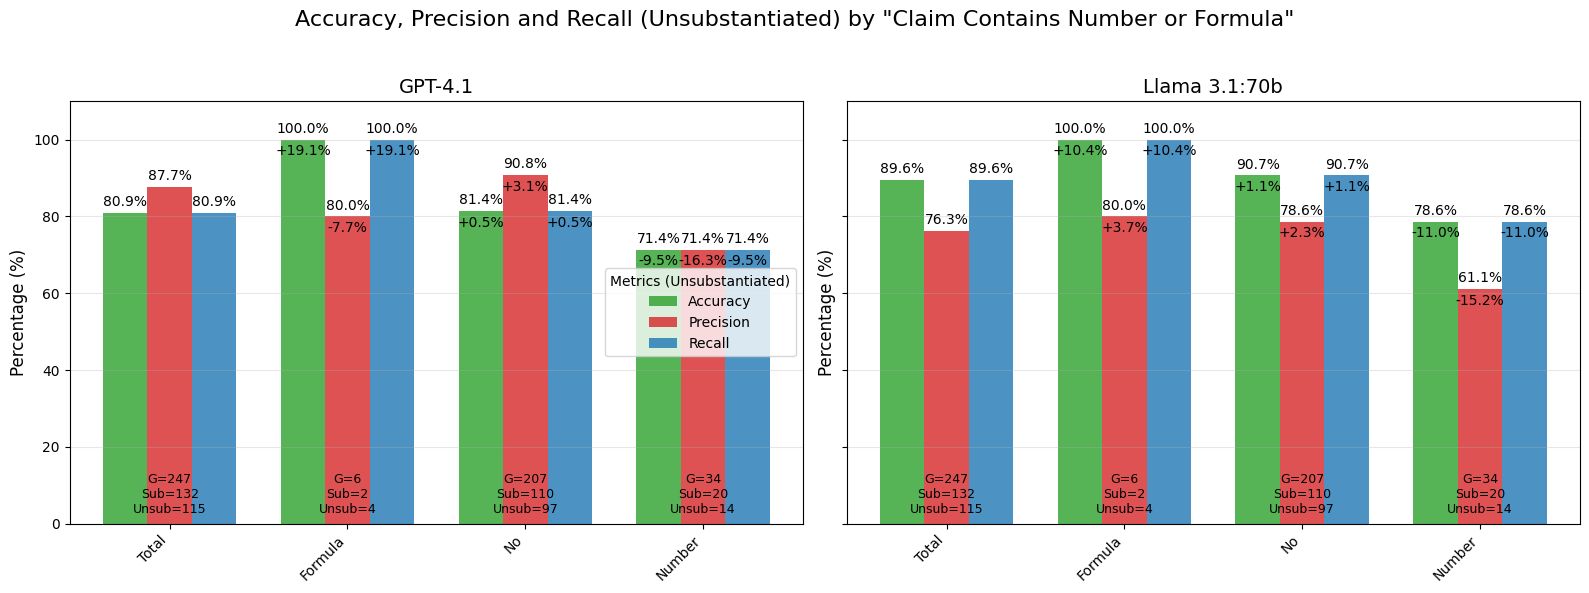

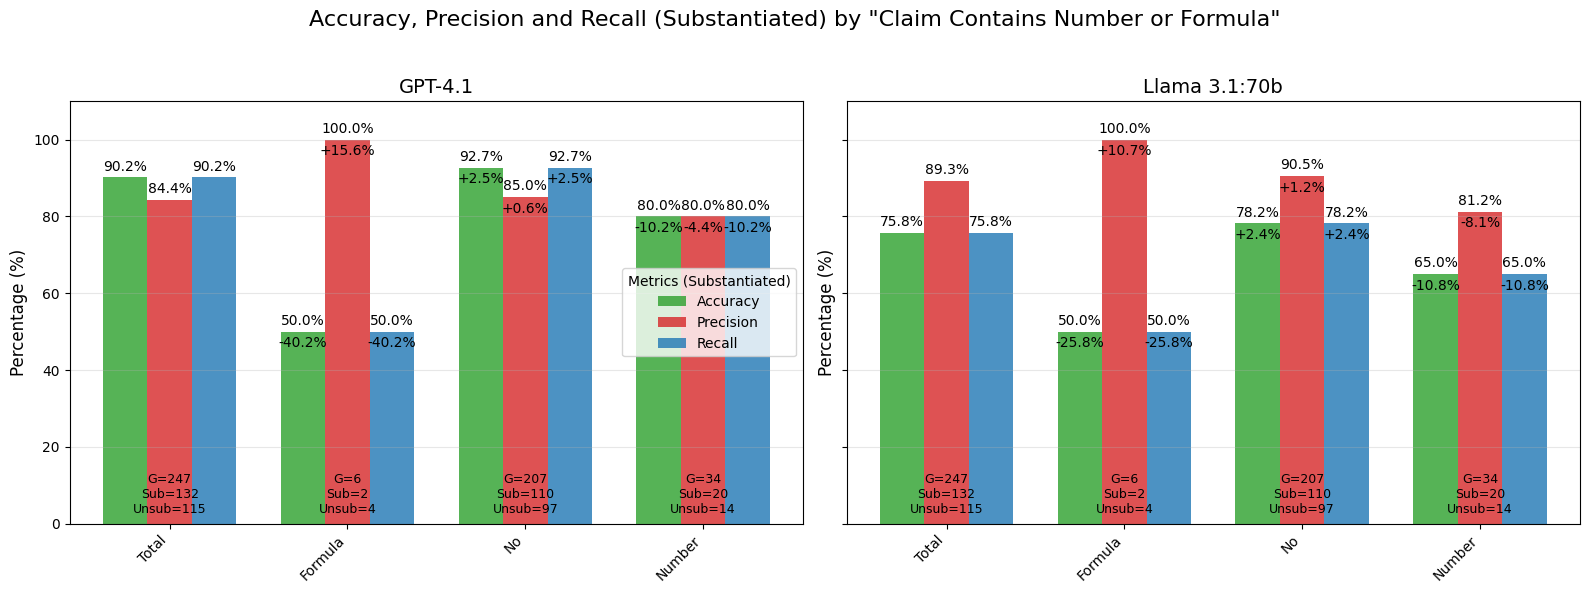

In [13]:
attribute = "Claim Contains Number or Formula"
results = attribute_predictions_per_model(model_dfs, attribute)
show_metrics_by_attribute_values(results, attribute, "Unsubstantiated")
show_metrics_by_attribute_values(results, attribute, "Substantiated")

In [14]:
significance_per_attribute_per_model(model_dfs, attribute)

Significance results for GPT-4.1 on attribute 'Claim Contains Number or Formula':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
No,2.0211,0.1337,1.2540,0.7467,3.7500,0.0421
Number,0.4718,0.1107,0.5422,0.4659,0.3495,0.1105
Formula,0.8213,1.0000,inf,1.0000,0.1017,0.1879


Significance results for Llama 3.1:70b on attribute 'Claim Contains Number or Formula':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
No,2.0000,0.1114,1.9556,0.3976,2.0476,0.1746
Number,0.4559,0.0874,0.3587,0.1623,0.5337,0.2592
Formula,1.0859,1.0000,inf,1.0000,0.3131,0.4275


### Amount Citations in Sentence

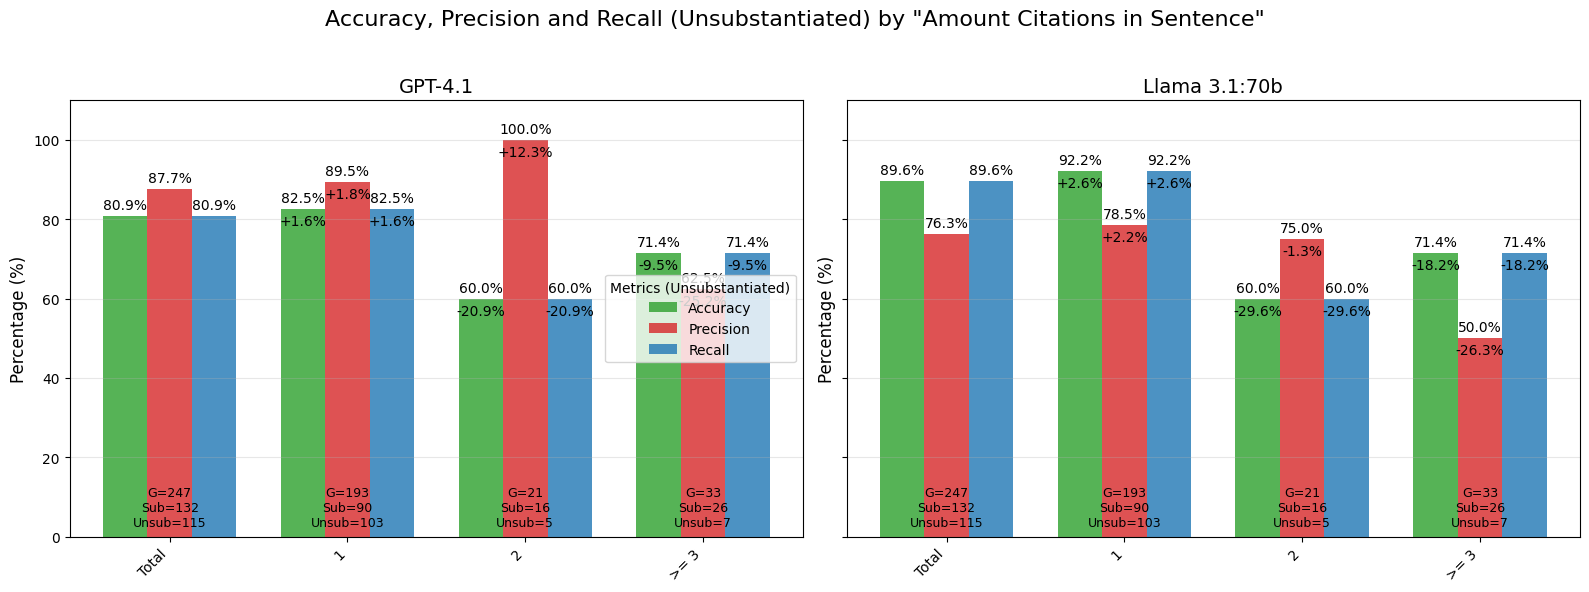

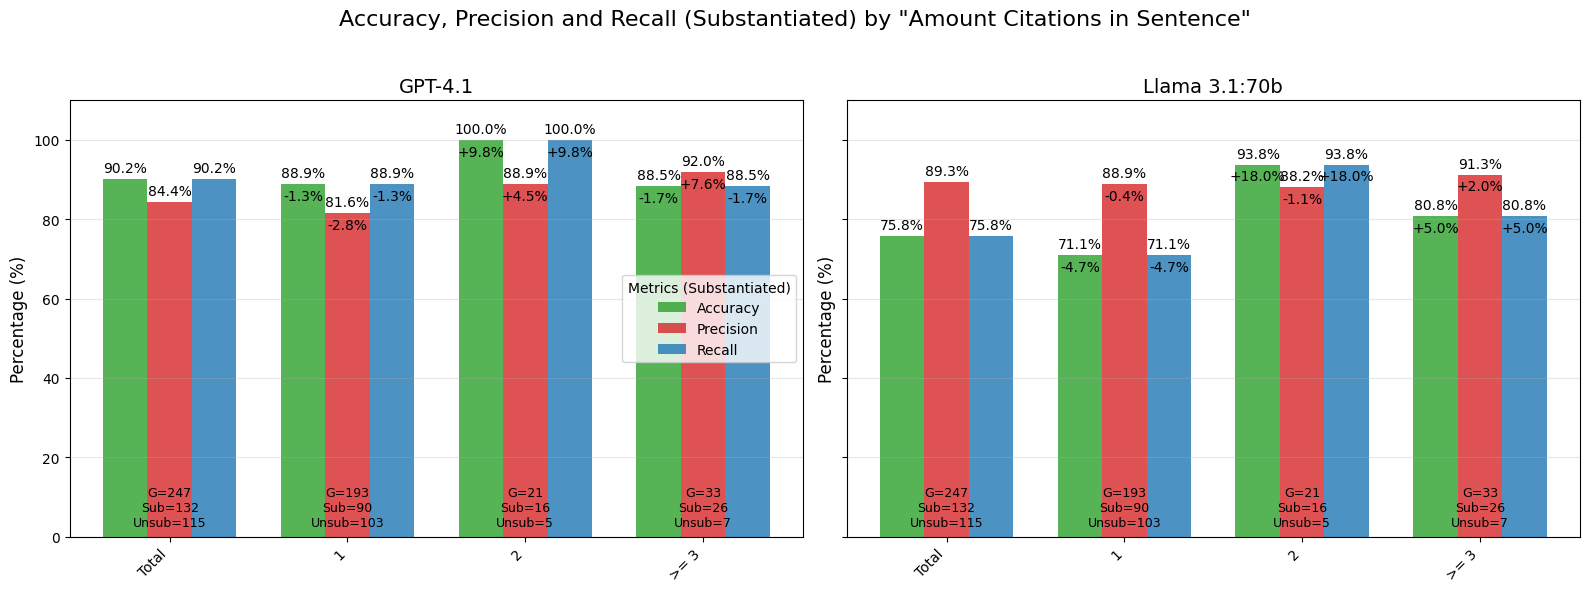

In [15]:
attribute = "Amount Citations in Sentence"
results = attribute_predictions_per_model(model_dfs, attribute, group_numbers_from=3)
show_metrics_by_attribute_values(results, attribute, "Unsubstantiated")
show_metrics_by_attribute_values(results, attribute, "Substantiated")

In [16]:
significance_per_attribute_per_model(model_dfs, attribute, group_numbers_from=3)

Significance results for GPT-4.1 on attribute 'Amount Citations in Sentence':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,0.8777,1.0000,2.3611,0.2396,0.6154,0.5499
2,1.6244,0.7472,0.3333,0.2428,inf,0.3656
>= 3,0.9130,0.7929,0.5682,0.6173,0.7986,0.7195


Significance results for Llama 3.1:70b on attribute 'Amount Citations in Sentence':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,1.0628,0.8430,5.9375,0.0219,0.4103,0.0826
2,1.3297,1.0000,0.1500,0.0839,5.4706,0.1165
>= 3,0.7764,0.6253,0.2551,0.1562,1.4354,0.6151


### Amount References for Claim

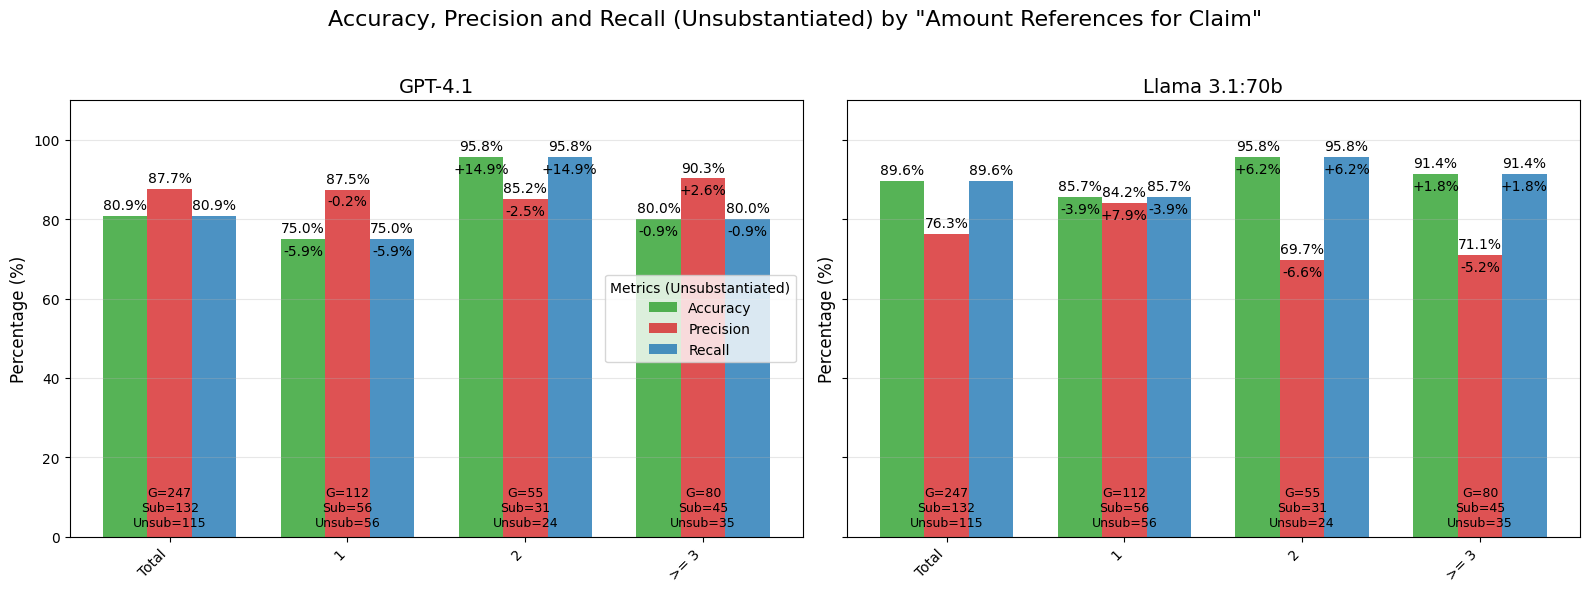

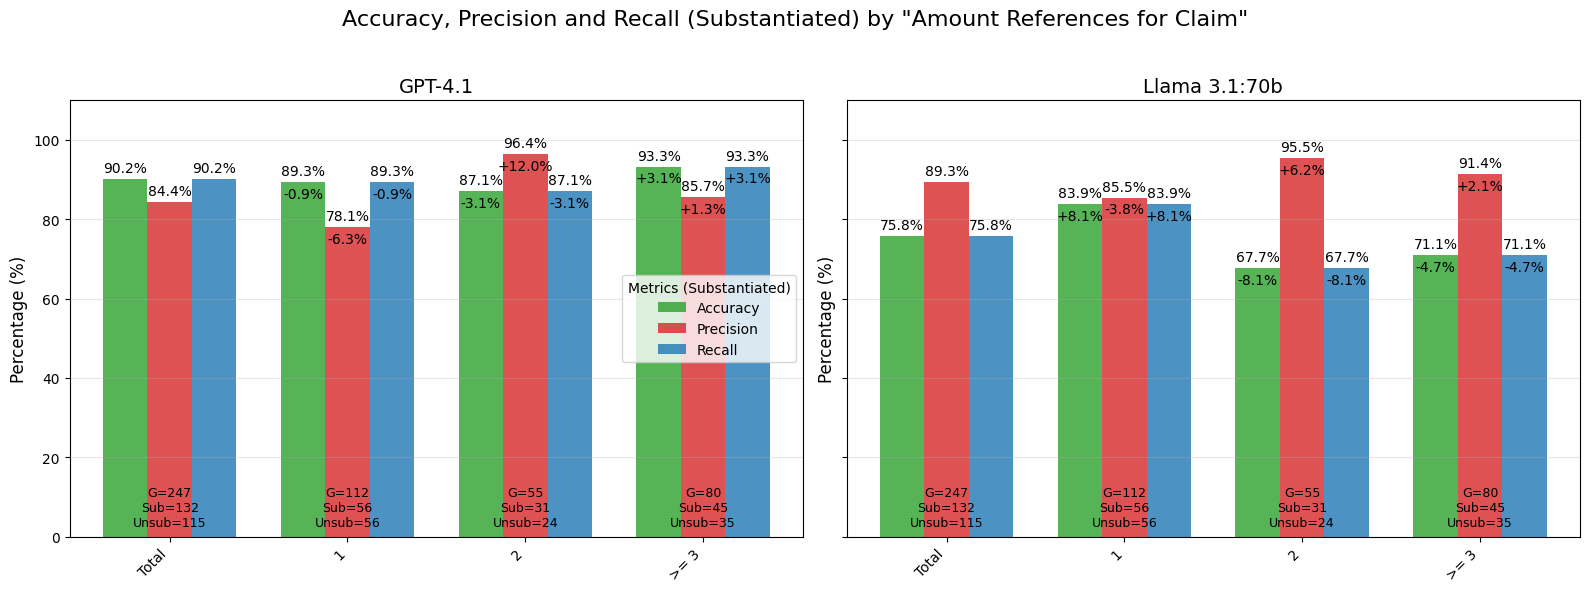

In [17]:
attribute = "Amount References for Claim"
results = attribute_predictions_per_model(model_dfs, attribute, group_numbers_from=3)
show_metrics_by_attribute_values(results, attribute, "Unsubstantiated")
show_metrics_by_attribute_values(results, attribute, "Substantiated")

In [18]:
significance_per_attribute_per_model(model_dfs, attribute, group_numbers_from=3)

Significance results for GPT-4.1 on attribute 'Amount References for Claim':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,0.5750,0.1453,0.4706,0.1558,0.8454,0.7764
2,1.8519,0.2763,6.9000,0.0412,0.6603,0.5025
>= 3,1.2324,0.6987,0.9231,1.0000,1.8182,0.5412


Significance results for Llama 3.1:70b on attribute 'Amount References for Claim':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,1.3971,0.4040,0.4364,0.2311,2.2662,0.0674
2,0.8302,0.6897,3.1625,0.4551,0.5848,0.2401
>= 3,0.8058,0.5947,1.3521,1.0000,0.6878,0.3967


### Claim Sentence Structure

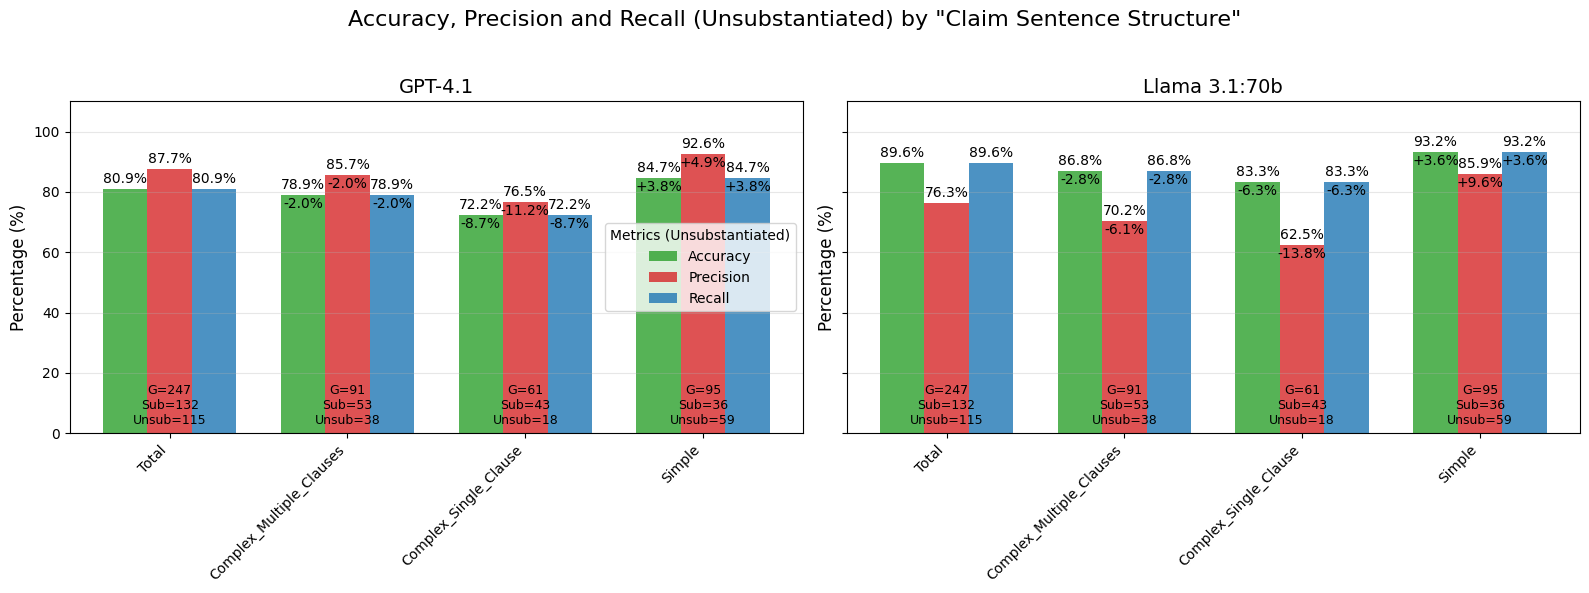

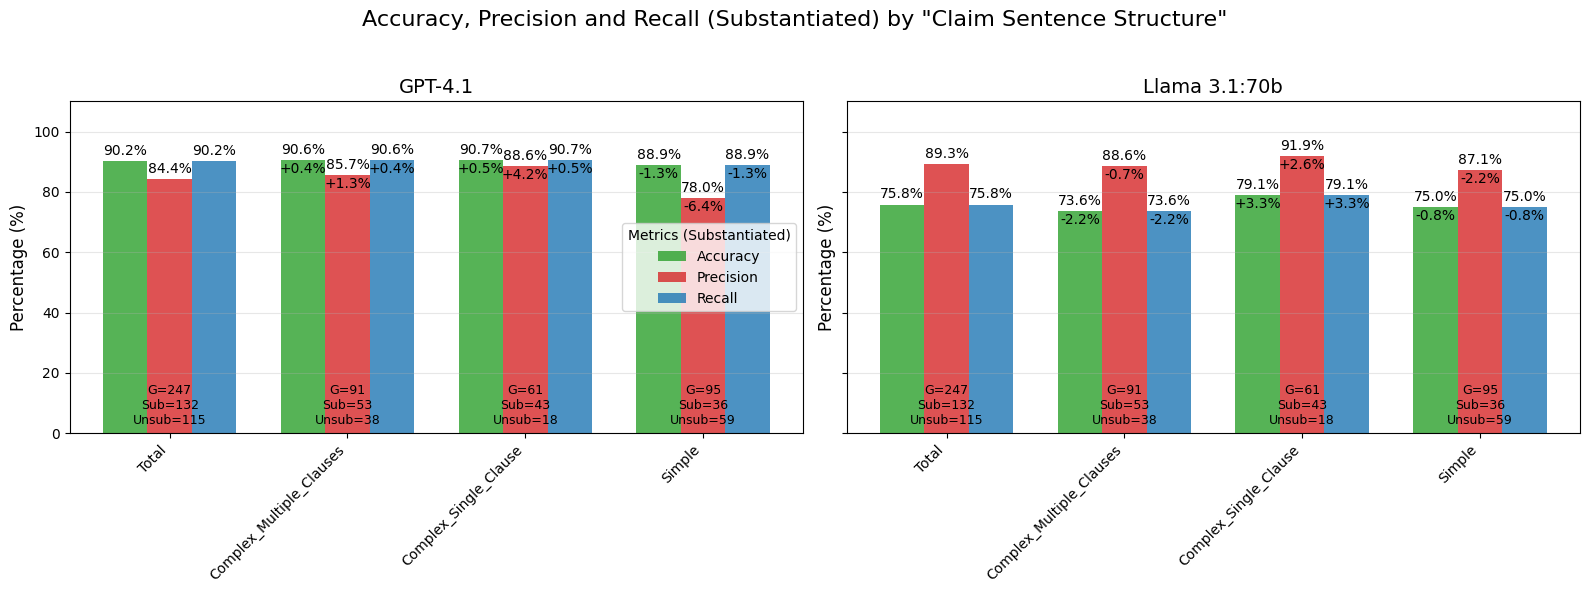

In [19]:
attribute = "Claim Sentence Structure"
results = attribute_predictions_per_model(model_dfs, attribute)
show_metrics_by_attribute_values(results, attribute, "Unsubstantiated")
show_metrics_by_attribute_values(results, attribute, "Substantiated")

In [20]:
significance_per_attribute_per_model(model_dfs, attribute)

Significance results for GPT-4.1 on attribute 'Claim Sentence Structure':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
Simple,1.0675,1.0000,1.6796,0.3453,0.8276,0.7500
Complex_Multiple_Clauses,0.9851,1.0000,0.8333,0.8021,1.0817,1.0000
Complex_Single_Clause,0.9389,0.8356,0.5525,0.3331,1.0969,1.0000


Significance results for Llama 3.1:70b on attribute 'Claim Sentence Structure':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
Simple,1.6160,0.2316,2.2917,0.2311,0.9452,1.0000
Complex_Multiple_Clauses,0.7232,0.3894,0.6600,0.5274,0.8220,0.6814
Complex_Single_Clause,0.8485,0.7008,0.5114,0.3976,1.3165,0.6659


### Amount Claims to Substantiate

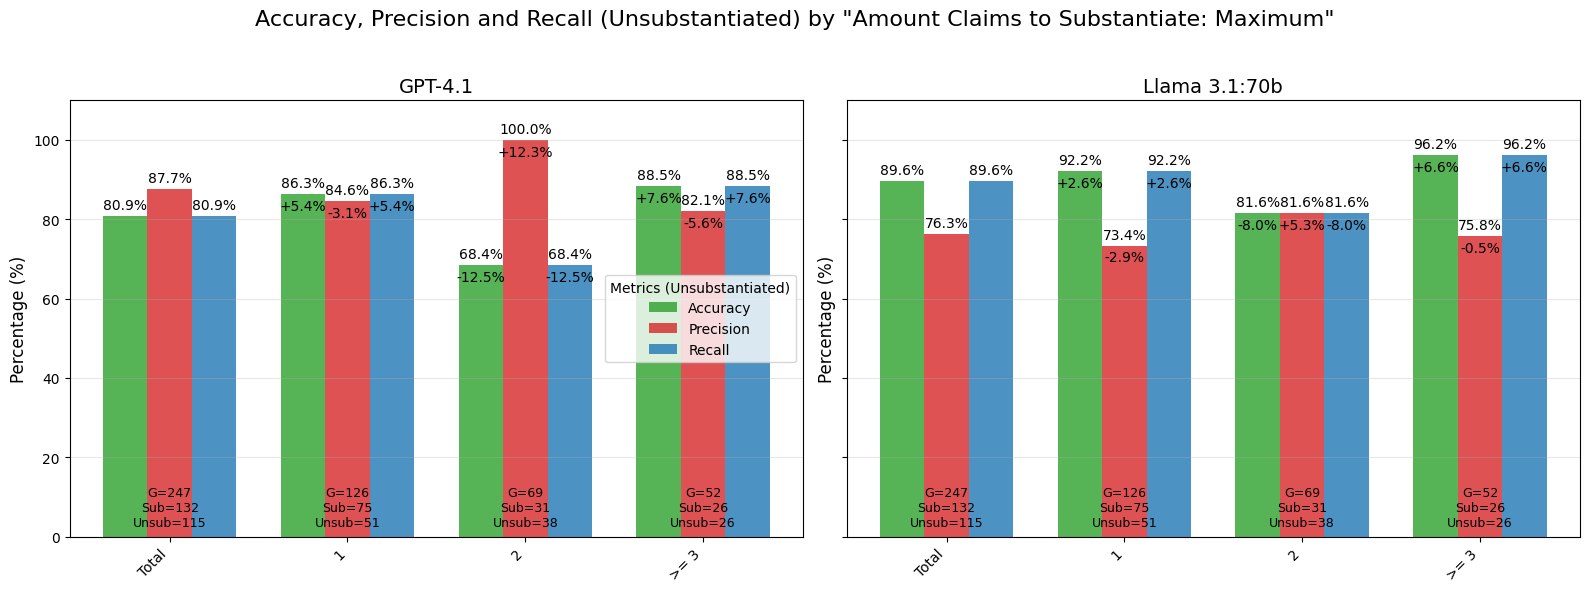

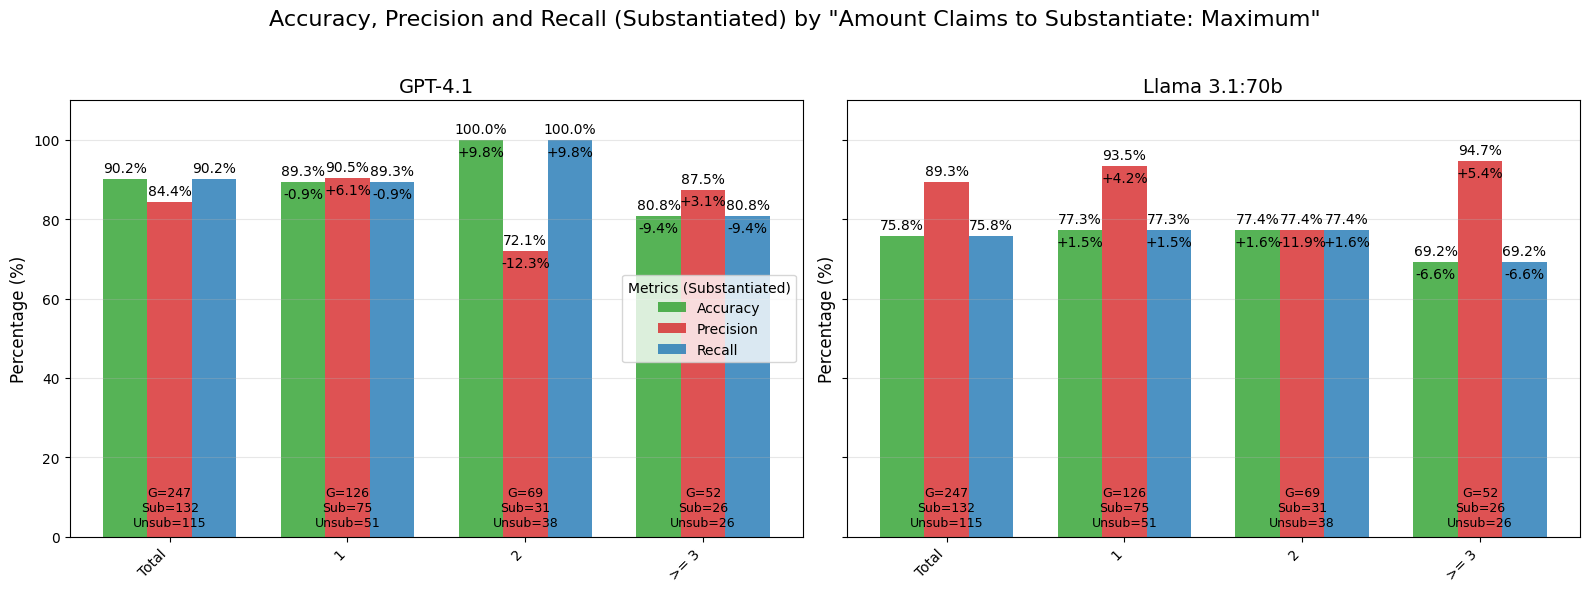

In [21]:
attribute = "Amount Claims to Substantiate: Maximum"
results = attribute_predictions_per_model(model_dfs, attribute, group_numbers_from=3)
show_metrics_by_attribute_values(results, attribute, "Unsubstantiated")
show_metrics_by_attribute_values(results, attribute, "Substantiated")

In [22]:
significance_per_attribute_per_model(model_dfs, attribute, group_numbers_from=3)

Significance results for GPT-4.1 on attribute 'Amount Claims to Substantiate: Maximum':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,1.4653,0.3623,1.9242,0.2361,0.8053,0.7764
2,0.7048,0.4166,0.3234,0.0235,inf,0.0379
>= 3,0.8839,0.8233,2.0810,0.3963,0.3429,0.1324


Significance results for Llama 3.1:70b on attribute 'Amount Claims to Substantiate: Maximum':
Statistical Significance Tests (Fisher Exact Test):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,1.1735,0.7397,1.6786,0.5444,1.2185,0.6842
2,0.7963,0.5790,0.3075,0.0593,1.1278,1.0000
>= 3,1.0451,1.0000,3.5256,0.2928,0.6585,0.4451


The accuracy is slightly higher when there is only one claim in the sentence related to this citation, and slightly lower when there 2-4 claims (Llama 3.1). For more than 4 claims there are only less than 10 examples in the dataset, so the results are not really reliable. For GPT 4.1 the accuracy increases for a maximum of 4 claims for some reason?